In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA of Instagram Likes

In [2]:
import json
json_string = json.loads(open('likes.json').read())

In [3]:
likes_keys = json_string.keys()
for key in likes_keys:
    print(key)

media_likes
comment_likes


In [4]:
media_likes = json_string['media_likes']
media_likes = pd.DataFrame(media_likes, columns = ['timestamp', 'userid'])

In [5]:
#top 5 people whose posts i liked the most.
likes_count_by_user = media_likes.groupby('userid').count().sort_values(by = 'timestamp', ascending = False)

In [6]:
#media_likes = media_likes.set_index('timestamp')

In [7]:
likes_count_by_user['timestamp'].head(5)

userid
harishthelion    335
shreyaghoshal    329
arsh.verma1      231
ulkagupta        220
narendramodi     202
Name: timestamp, dtype: int64

In [36]:
likes_count_by_user.loc['harishthelion'].timestamp

335

In [8]:
media_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 2 columns):
timestamp    8747 non-null object
userid       8747 non-null object
dtypes: object(2)
memory usage: 136.8+ KB


In [63]:
media_likes.head()

,timestamp,userid
0,2019-08-30T23:31:55,norafatehi
1,2019-08-30T14:38:00,poojabkarbhari
2,2019-08-30T11:20:13,the.realshit.gyan
3,2019-08-30T07:44:39,swativatssa
4,2019-08-30T07:44:22,mipalkarofficial


In [40]:
media_likes_with_time_index = pd.DataFrame()
media_likes_with_time_index['datetime'] = pd.to_datetime(media_likes['timestamp'])
media_likes_with_time_index['user_id'] = media_likes['userid']
#media_likes_with_time_index = media_likes_with_time_index.set_index('datetime')

In [216]:
media_likes_with_time_index['month'] = media_likes_with_time_index['datetime'].apply(lambda x : x.strftime('%m'))
media_likes_with_time_index['year'] = media_likes_with_time_index['datetime'].apply(lambda x : x.strftime('%Y'))
media_likes_with_time_index['day'] = media_likes_with_time_index['datetime'].apply(lambda x : x.strftime('%d'))

In [217]:
media_likes_with_time_index['month_year'] = media_likes_with_time_index['datetime'].apply(lambda x : x.strftime('%m - %Y'))

In [218]:
media_likes_with_time_index['time'] = media_likes_with_time_index['datetime'].dt.time

In [219]:
media_likes_with_time_index['hr'] = media_likes_with_time_index['time'].apply(lambda x : x.strftime('%H'))

In [220]:
media_likes_with_time_index

,datetime,user_id,month,year,day,month_year,time,hr
0,2019-08-30 23:31:55,norafatehi,08,2019,30,08 - 2019,23:31:55,23
1,2019-08-30 14:38:00,poojabkarbhari,08,2019,30,08 - 2019,14:38:00,14
2,2019-08-30 11:20:13,the.realshit.gyan,08,2019,30,08 - 2019,11:20:13,11
3,2019-08-30 07:44:39,swativatssa,08,2019,30,08 - 2019,07:44:39,07
4,2019-08-30 07:44:22,mipalkarofficial,08,2019,30,08 - 2019,07:44:22,07
5,2019-08-30 07:00:53,anu_slayer,08,2019,30,08 - 2019,07:00:53,07
6,2019-08-30 00:16:58,beingsanketmulay,08,2019,30,08 - 2019,00:16:58,00
7,2019-08-29 22:46:41,mohitgup26,08,2019,29,08 - 2019,22:46:41,22
8,2019-08-29 22:46:28,swativatssa,08,2019,29,08 - 2019,22:46:28,22
9,2019-08-29 10:35:26,mishra_anish,08,2019,29,08 - 2019,10:35:26,10


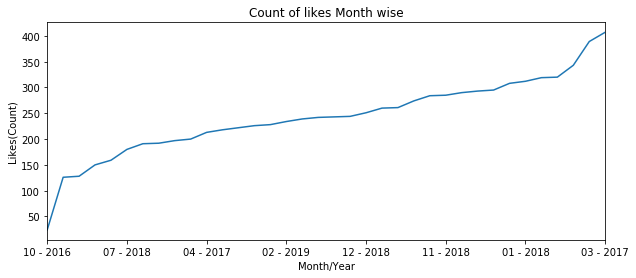

In [221]:
plt.figure(figsize = (10,4))
media_likes_with_time_index.groupby('month_year').count()['user_id'].sort_values().plot()
plt.xlabel('Month/Year')
plt.ylabel('Likes(Count)')
plt.title('Count of likes Month wise')
plt.show()

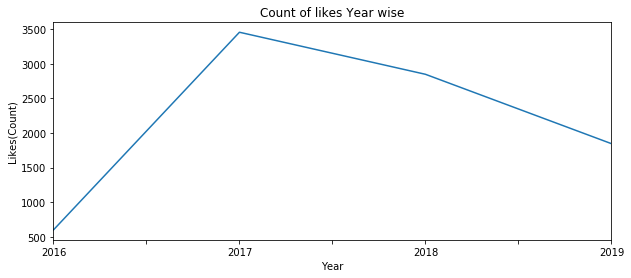

In [222]:
plt.figure(figsize = (10,4))
media_likes_with_time_index.groupby('year').count()['user_id'].sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Likes(Count)')
plt.title('Count of likes Year wise')
plt.show()

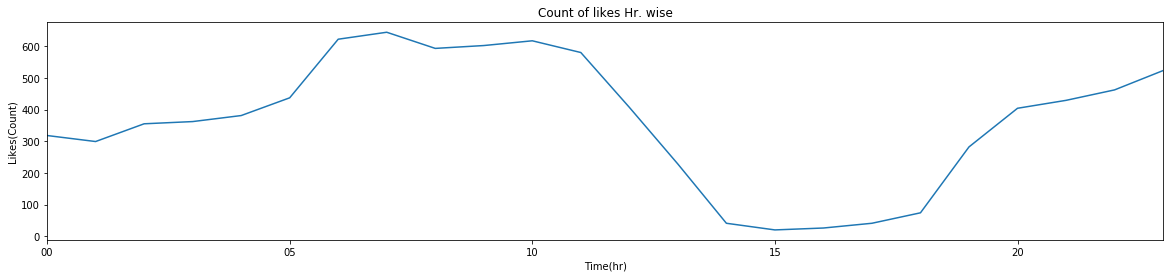

In [223]:
plt.figure(figsize = (20,4))
media_likes_with_time_index.groupby('hr').count()['user_id'].sort_index().plot()
plt.xlabel('Time(hr)')
plt.ylabel('Likes(Count)')
plt.title('Count of likes Hr. wise')
plt.show()

In [273]:
json_string_media = json.loads(open('media.json', encoding="utf8").read())

In [281]:
json_string_media.keys()

dict_keys(['stories', 'photos', 'profile', 'direct'])

In [287]:
media_stories = json_string_media['stories']
media_photos = json_string_media['photos']
media_profile = json_string_media['profile']
media_diret = json_string_media['direct']

In [296]:
media_stories_df = pd.DataFrame(media_stories)
media_photos_df = pd.DataFrame(media_photos)
media_profile_df = pd.DataFrame(media_profile)
media_diret_df = pd.DataFrame(media_diret)
stories = media_stories_df.shape[0]
photos = media_photos_df.shape[0]
profile = media_profile_df.shape[0]
direct = media_diret_df.shape[0]

In [297]:
print(stories, photos, profile, direct)

36 68 1 3


In [271]:
media_data = pd.DataFrame(columns = ['caption', 'timestamp', 'path'])

In [272]:
media_data['caption']

Series([], Name: caption, dtype: object)

In [267]:
media.head()

,caption,timestamp,path
0,Happy birthday🎂🎁🎉👑,NaN,stories/201907/da5b48742f9cddec44d2b7d5f889a40...
1,,NaN,stories/201906/d6ff1e36fc4f50eac7b935f1e7b9e5f...
2,Happy birthday... Keep smiling,NaN,stories/201906/e8994a9aa6d00e184be2d532edf11c6...
3,,NaN,stories/201905/daffcec746c9742de0600e2cf6d8a86...
4,,NaN,stories/201905/d4bf4d81b5f061fe03974d71a3e6d42...
